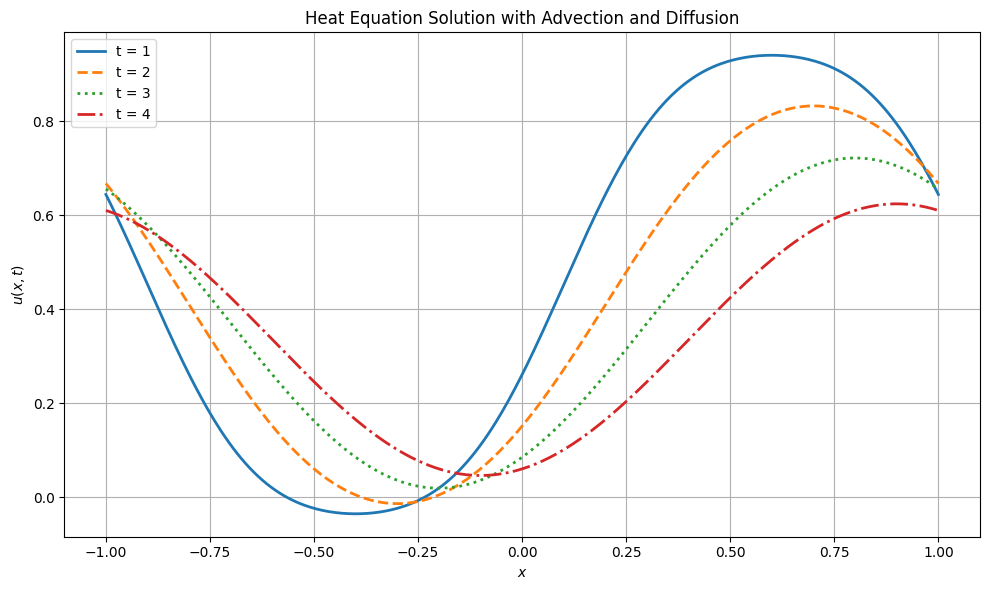

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 1
kappa = 0.02
beta = 0.1  # Advection coefficient
N = 20      # Truncation limit
t_values = [1, 2, 3, 4]
x_values = np.linspace(-L, L, 400)  # Spatial grid

def c_n(n):
    if n == 0:
        return 0.5  # For H(x) initial condition
        # return 0.0   # For 3cos(4πx/L) initial condition
    else:
        # Ensure floating base to handle negative exponents
        return ( ( (-1.0)**n ) -1 ) / (2j * n * np.pi )
        # For 3cos(4πx/L) initial condition:
        # if n == 4 or n == -4:
        #     return 1.5
        # else:
        #     return 0.0

def u(x, t):
    u_val = 0
    for n in range(-N, N + 1):
        c_initial = c_n(n)
        
        if n == 0:
            # For n=0, only diffusion (since advection does not affect the zero mode)
            lambda_n = beta  # From d a0/dt = -beta a0(t)
            c_t = c_initial * np.exp(-lambda_n * t)
            u_val += c_t
        else:
            # Compute lambda_n with advection
            lambda_n = kappa * (n * np.pi / L)**2 - 1j * beta * (n * np.pi / L )
            c_t = c_initial * np.exp(-lambda_n * t)
            # Correct exponent sign: use -i n pi x / L
            u_val += c_t * np.exp(-1j * n * np.pi * x / L )
    return np.real(u_val)  # Ensure the solution is real

# Plotting
plt.figure(figsize=(10, 6))

# Define distinct line styles for black and white compatibility
line_styles = ['-', '--', ':', '-.']

for i, t in enumerate(t_values):
    # Vectorized computation for efficiency
    u_values = [u(x, t) for x in x_values]
    plt.plot(x_values, u_values, linestyle=line_styles[i % len(line_styles)],
             linewidth=2, label=f't = {t}')

plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title('Heat Equation Solution with Advection and Diffusion')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
